## Solving Ordinary Differential Equations Numerically

**Nick Kern**
<br>
**Astro 9: Python Programming in Astronomy**
<br>
**UC Berkeley**

Reading: Chp. 8, Computational Physics w/ Python, Newman

In this lecture, we are going to be talking about how to apply the concepts we've been building with numerical integration and differentiation to solving *ordinary differential equations*. A differential equation is just an equation that relates two variables together via a derivative. For example, one of the simplest DE is the equation of motion of an object with a constant acceleration:

\begin{align}
\frac{dx}{dt} = at + v_{0}
\end{align}

which can easily be solved by-hand using separation of variables and integrating to get $x(t)$.

The general form of a first-order, ordinary differential equation looks like

\begin{align}
\frac{dx}{dt} = f(x, t),
\end{align}

in which case, the independent variable is $t$ and the dependent variable is $x$. You may have noticed if you did the first integral in your head that in order to actually solve these equations, we need to not only integrate it but also provide a boundary condition or an initial condition (the integration constant!).

Why do we care to solve an ODE numerically? In the case of our first example, we don't, really, because we can do that simply by-hand. However, there are *plenty* of equations in Astrophysics that either cannot be solved analytically, are just too tedious to be solved by-hand, or are neither but need to just be evaluated many, many times, in which case, we'd like a computer to do it for us!

One good example of an applicable (second-order) differential equation is one that describes the motion of an object subject to a Newtonian gravitational force:

\begin{align}
\vec{F} = ma = m\frac{d^{2}x}{dt^{2}} = -\frac{GMm}{r^{2}}{\hat{r}}
\end{align}

This form of equation applies not only to something like a planet orbiting a star, but also, for example, to a sattelite orbiting the Earth or to molecular dynamics. Solutions to equations of this form are generally applicable outside of just gravitational physics, and are particularly useful for determining the equation of motion of charged objects subject to an electric field because the electric force follows the same functional form.

Let's first start by discussing ways we can solve first-order ODEs.

### Euler's Method

Suppose we are given an equation of the form $\frac{dx}{dt} = f(x, t)$ and are given an initial condition of $x$ given some time $t_{1}$. **Our goal is to solve for the function $x(t)$** for all times $t$.

Using a Taylor expansion, we can write the value of $x$ at some later time as:

\begin{align}
x(t + \Delta t) &= x(t) + \Delta t\frac{dx}{dt} + \frac{1}{2}{\Delta t}^{2}\frac{d^{2}x}{dt^{2}} + \ldots \\
\\
&= x(t) + \Delta t\cdot f(x, t) + \mathcal{O}(\Delta t^{2})
\end{align}

If we take $\Delta t$ to be small, than the first two terms of this equation may be a good approximation to the true answer:

\begin{align}
x(t + \Delta t) \simeq x(t) + \Delta t\cdot f(x, t)
\end{align}

Note that what we have above is nothing more than just an extrapolation of a function, $x(t)$, based on its first derivative, which we call $f(x, t) = \frac{dx}{dt}$.

In order to solve for $x$ at some later time $t_{2}$, we need only divide up our timeline from $t_{1} < t < t_{2}$ into a bunch of small chunks and use the above method *at each chunk* to reach our answer of $x(t_{2})$. This is called *Euler's Method*.

**Example**

Let's use Euler's method to solve the differential equation

\begin{align}
\frac{dx}{dt} = -x^{3} + \sin(t)
\end{align}

with an initial condition of $x = 0$ when $t=0$. Find the value of $x(t = 10)$.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# define first derivative function
def f(x, t):
    return -x**3 + np.sin(t)
    

# Define bounds and step-sizes
t1 = 0
t2 = 10
N = 100
dt = float(t2-t1)/N

# Make t-points
tpoints = np.linspace(t1, t2, N+1)

# Define initial condition
x = 0

# Iterate Euler's Method to get x(t)
xpoints = []
for t in tpoints:
    # append value of x to xpoints
    xpoints.append(x)
    
    # update value using Euler's method
    x += dt * f(x, t)


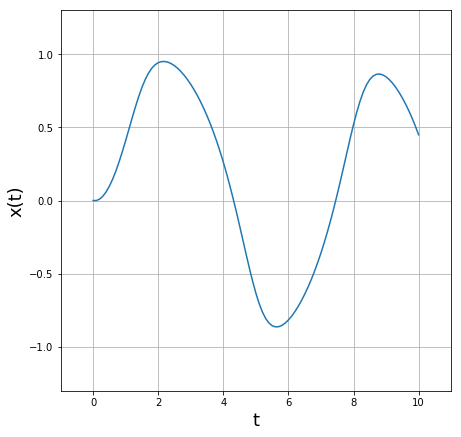

In [5]:
# figure
fig = plt.figure(figsize=(7,7))

# axes
ax = fig.add_subplot(1, 1, 1)
ax.grid(True)
ax.set_xlim(-1,11)
ax.set_ylim(-1.3,1.3)
ax.set_xlabel('t', fontsize=18)
ax.set_ylabel('x(t)', fontsize=18)

# plot
ax.plot(tpoints, xpoints)

You can see from our Taylor expansion argument that the error term in Euler's method scales as $\mathcal{O}(\Delta t^{2})$. This is the error induced *at each point* in our iteration. You can see that each point relies on the answer from the previous point, meaning error in compounded all the way to our final answer, $x(t_{2}$). To get the error on our final answer, we need to sum the error term of each point:

\begin{align}
\epsilon_{t_{2}} &= \sum_{k=0}^{N-1}\frac{1}{2}{\Delta t}^{2}\left(\frac{d^{2}x}{dt^{2}}\right)_{t=t_{k}} = \frac{1}{2}\Delta t\sum\Delta t\left(\frac{df}{dt}\right)\\
\\
&\simeq \frac{1}{2}\Delta t\int_{t_{1}}^{t_{2}}\frac{df}{dt}dt = \boxed{\frac{1}{2}\Delta t\left[f(x_{t_{2}},t_{2}) - f(x_{t_{1}}, t_{1})\right]}
\end{align}

Note that in this case, the error on the final answer $x(t_{2})$ only scales as $\Delta t^{1}$, which is worse than the error we accumulate per-point from Euler's method.

### Breakout 1

1.
Put your above script into a function called `ode_solve` that takes as input the derivative function $f$, the initial condition of $x_1$ and $t_1$, the stopping time $t_2$ and the number of time steps $N$ between $t_1$ and $t_2$. Have it return the two arrays `tpoints` and `xpoints`.

2.
Use your function to solve for $x(t)$ for initial conditions of

* x = 0, t = 0
* x = 1, t = 0
* x = -1, t = 0
* x = 0, t = 2

and plot all of these curves on a single plot.

In [ ]:
def ode_solve(f, x1, t1, t2, N=100):
    
    
    
    
    return tpoints, xpoints

### Second-Order Runge-Kutta

Euler's method may work well for our simple toy-model problem over a modest range of times. However, for more complex problems the poor error properties of Euler's method will prove fatal. Let's see if we can devise a more accurate algorithm for solving an ODE.

Runge-Kutta methods are a class of methods for solving ODE's. The first-order RK method is, for example, just Euler's method. Higher order methods, like second-order and fourth-order methods, are more accurate than first-order RK and are therefore of great importance.

Let's think back to our discussion of numerical derivatives. We saw two basic methods for performing a numerical derivative: the forward difference and central difference. The forward difference is similar to what we are doing in Euler's method, however, we saw that the central difference was much more accurate in estimating the derivative. The idea behind second-order Runge-Kutta is to use a central difference for the derivative, rather than the forward difference.

<img src='imgs/rk2.png' width=400px/>
<center>Figure 8.2 of Newman</center>

Mathematically, this means we invoke a Taylor expansion not around $t$, but around $t + \Delta t/2$, meaning we can get the value at $x(t+\Delta t)$ as

\begin{align}
x(t+\Delta t) = x(t + \frac{1}{2}\Delta t) + \frac{1}{2}\Delta t\left(\frac{dx}{dt}\right)_{t + \frac{1}{2}\Delta t} + \frac{1}{8}\Delta t^{2}\left(\frac{d^{2}x}{dt^{2}}\right)_{t + \frac{1}{2}\Delta t} + \mathcal{O}(\Delta t^{3}).
\end{align}

Similarly, we get can the value of $x(t)$ using our expansion centered at $t + \Delta t/2$ as

\begin{align}
x(t) = x(t + \frac{1}{2}\Delta t) - \frac{1}{2}\Delta t\left(\frac{dx}{dt}\right)_{t + \frac{1}{2}\Delta t} + \frac{1}{8}\Delta t^{2}\left(\frac{d^{2}x}{dt^{2}}\right)_{t + \frac{1}{2}\Delta t} + \mathcal{O}(\Delta t^{3}).
\end{align}

If we take the difference of these two equations, we are left with

\begin{align}
x(t+\Delta t) = x(t) + \Delta t\cdot f(x,t+\frac{1}{2}\Delta t) + \mathcal{O}(\Delta t^{3})
\end{align}

Notice two major things: (1) the first two terms is similar to our Euler method from before, except now the error term goes not as $\Delta t^{2}$ but as $\Delta t^{3}$ (which is why this is called "second-order" RK) and (2) the evaluation of our derivative function $f$ is no longer at $t$ but at $t + \frac{1}{2}\Delta t$, which we don't know! We can get around this by using our Euler's method from before to make the approximation $x(t + \frac{1}{2}\Delta t) = x(t) + \frac{1}{2}\Delta t\cdot f(x,t)$, and then insert that result into $f$ to complete the second-order Runge-Kutta method.

The full method can therefore be written as

\begin{align}
k_1 &= \Delta t\cdot f(x, t)\\
k_2 &= \Delta t\cdot f(x+\frac{1}{2}k_1, t + \frac{1}{2}\Delta t)\\
x(t + \Delta t) &= x(t) + k_2
\end{align}



**Example**

Let's modify our `ode_solve` function from before to incorporate the second-order Runge-Kutta method (aka, RK2). It is almost identical, with the exception of a few extra lines.

In [ ]:
# define first derivative function
def f(x, t):
    return -x**3 + np.sin(t)

# Define bounds and step-sizes
t1 = 0.0
t2 = 10.0
N = 10
dt = float(t2-t1)/N

# Make t-points
tpoints = np.linspace(t1, t2, N+1)

# Define initial condition
x = 0.0

# Iterate Euler's Method to get x(t)
xpoints = []
for t in tpoints:
    # append value of x to xpoints
    xpoints.append(x)
    
    # update value using RK2 method
    


### Fourth-Order Runge-Kutta

We can continue to expand on our previous argument of taking central differences rather than forward differences to approximate the derivatives. The more sophisticated we get, however, the more complicated the equations become. A commonly agreed upon "sweet-spot" is the *fourth-order Runge-Kutta* method. We won't go through the derivation here, which is quite complicated, but will quote the result for us to use. This fourth-order Runge-Kutta method (aka. RK4) has an error term that scales as $\mathcal{O}(\Delta t^{5})$, making it two orders better than RK2. The equations look like:

\begin{align}
k_1 &= \Delta t\cdot f(x, t)\\
k_2 &= \Delta t\cdot f(x + \frac{1}{2}k_1, t + \frac{1}{2}\Delta t)\\
k_3 &= \Delta t\cdot f(x + \frac{1}{2}k_2, t + \frac{1}{2}\Delta t)\\
k_4 &= \Delta t\cdot f(x + k_3, t + \Delta t)\\
x(t + \Delta t) &= \boxed{x(t) + \frac{1}{6}(k_1 + 2k_2 + 3k_3 + k_4)}
\end{align}

### Breakout 2

1.
Take the above script for the second-order Runge-Kutta method and modify it to use the fourth-order RK method. Put it into a function called `RK4`, similar to your `ode_solve` function, which takes the same parameters.

2.
Use your `RK4` function to solve the same differential equation from before: $f(x, t) = \frac{dx}{dt} = -x^{3} + \sin(t)$ and make a plot of it. How many steps $N$ do we need to converge to a stable answer, as compared to what we got with Euler's method?

In [ ]:
def RK4(f, x1, t1, t2, N=10):
    
    
    
    
    return tpoints, xpoints